<a href="https://colab.research.google.com/github/FranciscoFoz/Visualizacoes_TesesDissertacoes_Biblioteconomia_Brasil/blob/main/Visualizando_Teses_Dissertacoes_Biblioteconomia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= #9933ff		size = 6> Visualizando os dados de teses e dissertações de Biblioteconomia do Brasil <font>

## <font color= #9933ff	> RESUMO <font>
Este projeto tem como objetivo principal realizar visualizações dos dados das teses e dissertações de biblioteconomia do Brasil.

Ele será feito com a biblioteca do Matplotlib, além de utilizar o Pandas.



### <font color= #9933ff	> OBJETIVO <font>
Explorar a construção de visualizações relevantes para algumas métricas em relação ao tema.

### <font color= #9933ff	> DATASET <font>
O dataset explorado neste projeto foi coletado através da BDTD no dia 02/12/2021.



### <font color= #9933ff	> MÉTODO DE COLETA <font>

Utilizei o termo "biblioteconomia" no campo de busca para todos os termos.
Retornaram 1182 resultados, no qual eu realizei o download através da API fornecida pela BDTD.
Modifiquei o limite da API, para que realizasse a coleta inteira dos dados e não se limitasse ao padrão de 1000.

## <font color= #9933ff	> Métricas que serão visualizadas <font>

<font color = lightgrey > <font>
1.   Quantidade total de documentos
2.   Quantidade de teses e dissertações
3.   Quantidade de teses e dissertações publicadas ao longo do tempo
4.   Quantidade teses e dissertações por instituição 



## <font color= #9933ff	> Importando bibliotecas <font>

Bibliotecas utilizadas
*    Pandas
*    Matplotlib (V. 3.4.2)
*    Numpy



In [1]:
!pip install matplotlib==3.4.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


## <font color= #9933ff	> Importando dados <font>


In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Visualizacoes_TesesDissertacoes_Biblioteconomia_Brasil/main/Dataset/teses_dissertacoes_biblio_BDTD-20211202.csv',
                    sep=';', encoding = 'UTF8')

In [4]:
dados.head()

,id,title,abstract_por,authors,contributors,subjectsCNPQ,subjectsPOR,institutions,departements,programs,types,accesslevel,publicationDates,urls,formats,languages,Unnamed: 16
0,PUC_SP-1_646cc3010615e7f63d02ae06a49878ce,Epistemologia da Biblioteconomia,Em 1981 apontei num breve artigo que entitulei...,"primary[Mostafa, Solange Puntel(http://buscate...","advisor[Cesar, Constanca Marcondes(NA)]",CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,Epistemologia|Ciência da informação|Filosofia ...,PUC_SP,Educação,Programa de Estudos Pós-Graduados em Educação:...,doctoralThesis,openAccess,1985,https://tede2.pucsp.br/handle/handle/10705,doctoralThesis,por,NaN
1,UFMG_b863e34626b3175aee16422528984cd0,Biblioteconomia contemporânea: desafios e real...,Esta pesquisa foi realizada com o objetivo de ...,primary[Emanuelle Georgia Amaral Ferreira(NA)],advisor[Carlos Alberto Avila Araujo(NA)]|refer...,NaN,Nova Biblioteconomia|Biblioteca|Biblioteconomi...,UFMG,NaN,NaN,masterThesis,openAccess,2016,http://hdl.handle.net/1843/BUOS-AV2HH8,masterThesis,por,NaN
2,UFSC_cca4e2ff56abbbe594044faf2aee572a,O gênero na Biblioteconomia : percepção de bib...,Esta tese teve como objetivo investigar o gêne...,"primary[Sousa, Beatriz Alves de(NA)]","advisor[Pedro, Joana Maria(NA)]|coadvisor[Cunh...",NaN,NaN,UFSC,NaN,NaN,doctoralThesis,openAccess,2014,https://repositorio.ufsc.br/xmlui/handle/12345...,doctoralThesis,por,NaN
3,UNB_f1d4b45d940b27b572fb71c88e4ca2b8,Problemática da realização de pesquisa pelos p...,Pesquisa exploratória dos elementos individuai...,"primary[Barretto, Clara Maria Weber(NA)]","advisor[Figueiredo, Nice Menezes de(NA)]",NaN,NaN,UNB,NaN,NaN,masterThesis,openAccess,1981,http://repositorio.unb.br/handle/10482/35267,masterThesis,por,NaN
4,UFC-7_ff534a7cfa8d99e4d16b8f5c13e5ec0f,Diagnóstico da acessibilidade informacional na...,"The hugh advance in science and technology, th...","primary[Fernandes, Joana D'Arc Páscoa Bezerra(...","advisor[Souza, Osvaldo de(NA)]",NaN,Biblioteconomia brasileira|Acessibilidade info...,UFC,NaN,NaN,masterThesis,openAccess,2018,http://www.repositorio.ufc.br/handle/riufc/33425,masterThesis,por,NaN


## <font color= #9933ff	> 1.   Quantidade total de documentos <font>



In [5]:
len(dados)

1182

### <font color= #9933ff	> 1.1   Visualização de dados <font>


Text(0, 0, 'listadas na BDTD. \nEntre 1972 e 2021')

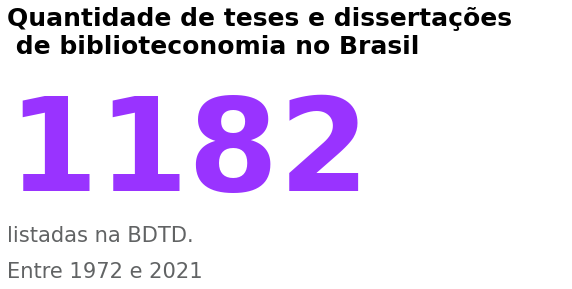

In [36]:
plt.figure(figsize=(10, 4),                                                     #Ajustando o tamanho
           facecolor='white')                                                   #Escolhendo a cor do fundo

for spine in plt.gca().spines.values():                                         #Removendo os eixos do gráfico
    spine.set_visible(False)

plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)   #Excluindo os valores dos eixos


plt.text(0, 1.03,                                                               #Ajustando posição dos eixos
         'Quantidade de teses e dissertações \n de biblioteconomia no Brasil',  #Colocando o título
         fontsize=25,                                                           #Formatando o tamanho  
         color='black',                                                         #Formatando a cor
         weight="bold")                                                         #Formatando em negrito

plt.text(0, 0.40,                                                               #Ajustando posição dos eixos
         '$\\bf{1182}$',                                                        #Colocando número com formatação em negrito com auxílio de regex                     
         fontsize=130,                                                          #Formatando o tamanho
         color='#9933ff')                                                       #Formatando a cor

plt.text(0, 0,                                                                  #Ajustando posição dos eixos
         'listadas na BDTD. \nEntre 1972 e 2021',                               #Colocando o terceiro texto
         fontsize=21,                                                           #Formatando o tamanho
         color='#616364',                                                       #Formatando a cor
         linespacing=2)                                                         #Formatando a cor


## <font color= #9933ff	> 2.   Quantidade de teses e dissertações <font>



### <font color= #9933ff	> 2.1   Manipulação de dados <font>


In [7]:
dados['types'].value_counts()                                                   #Verificar quantidade

masterThesis      910
doctoralThesis    272
Name: types, dtype: int64

In [8]:
tese_dissertacao = {'masterThesis':'Dissertação', 'doctoralThesis':'Tese'}      #Criar um dicionário para modificar o nome do tipo do documento
dados['types'] = dados['types'].map(tese_dissertacao)                           #Mapear a coluna com o novo nome

In [9]:
quantidade_teses_dissertacoes = pd.DataFrame(dados['types'].value_counts())     #Criar DataFrame com a quantidade


In [10]:
quantidade_teses_dissertacoes.columns = ['Quantidade']

### <font color= #9933ff	> 2.2   Visualização de dados <font>


Visualização crua

<AxesSubplot:ylabel='Quantidade'>

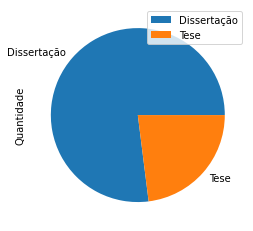

In [11]:
quantidade_teses_dissertacoes.plot.pie(y='Quantidade')

Visualização customizada

Text(0.5, 1.0, 'Quantidade de teses e dissertações de \n biblioteconomia no Brasil')

<Figure size 432x288 with 0 Axes>

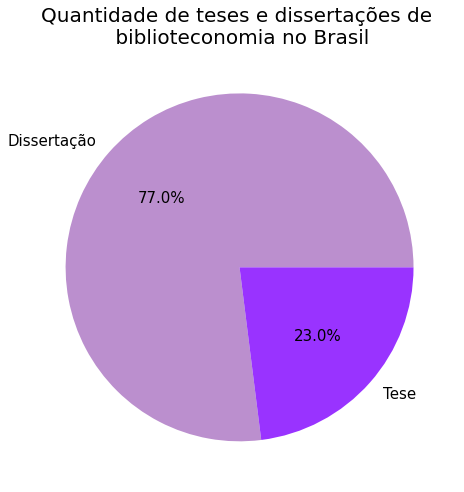

In [12]:
plt.figure(facecolor='white')                                                   #Escolhendo a cor do fundo
quantidade_teses_dissertacoes.plot.pie(y='Quantidade',                          #Criando gráfico
                                       figsize=(8, 8),                          #Ajustando o tamanho
                                       fontsize=15,                             #Ajustando o tamanho da letra do rótulo
                                       legend =None,                            #Excluindo a legenda
                                       autopct='%1.1f%%',                       #Inserindo a proporção de percentual
                                       colors=['#BB8FCE','#9933ff'])            #Alterando a cor
                                       
plt.ylabel(None)                                                                #Excluindo o label
plt.title('Quantidade de teses e dissertações de \n biblioteconomia no Brasil', #Colocando o título
          fontsize=20)                                                          #Alterando o tamanho do título



Gráfico de barras empilhadas é melhor do que o gráfico de torta, devido aos problemas do gráfico ser redondo e dificultar o entendimento da quantidade. 

Por isso, irei realizar um gráfico de barras empilhadas.

Visualização crua:

<AxesSubplot:>

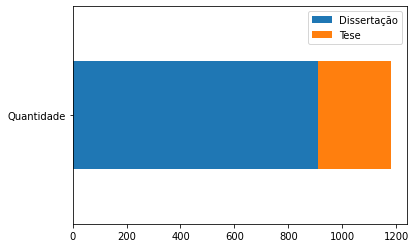

In [13]:
quantidade_teses_dissertacoes.T.plot(kind='barh',stacked=True) 

Criando variáveis para os percentuais

In [14]:
d_percent = str(round(quantidade_teses_dissertacoes['Quantidade'][0]/quantidade_teses_dissertacoes['Quantidade'].sum(),2)*100)   #% Dissertações
t_percent = str(round(quantidade_teses_dissertacoes['Quantidade'][1]/quantidade_teses_dissertacoes['Quantidade'].sum(),2)*100)   #% Teses


Criando variáveis para os números

In [15]:
n_dissertacoes = quantidade_teses_dissertacoes['Quantidade'][0]
n_teses = quantidade_teses_dissertacoes['Quantidade'][1]

Visualização personalizada

Text(0.0, 1.0, 'Quantidade de teses e dissertações \nde biblioteconomia no Brasil')

<Figure size 432x288 with 0 Axes>

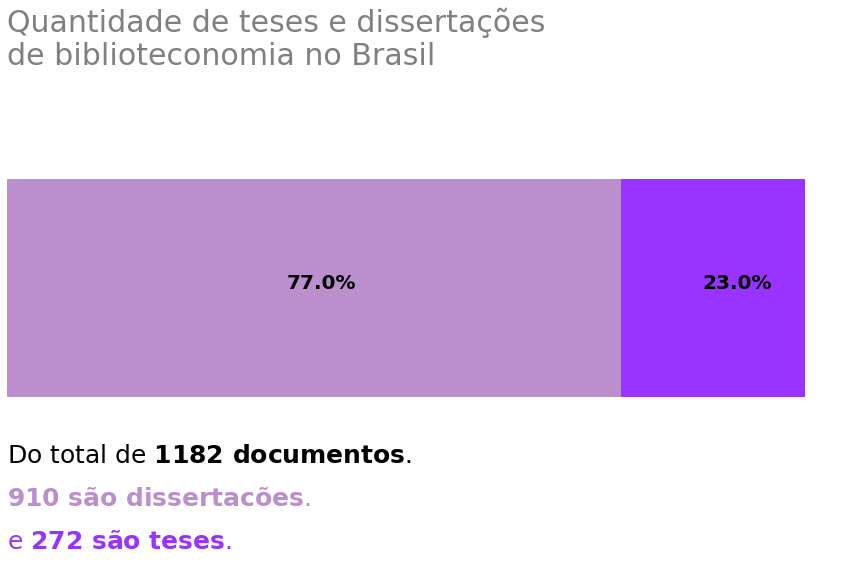

In [34]:
plt.figure(facecolor='white')                                                   #Escolhendo a cor do fundo
quantidade_teses_dissertacoes.T.plot(kind='barh',                               #Plotar o gráfico
                                     stacked=True,                              #Empilhar as barras
                                     figsize=(15,8),                            #Ajustar o tamanho
                                     color=['#BB8FCE','#9933ff'],               #Escolher a cor
                                     fontsize=15,                               #Ajustar o tamanho da fonte
                                     legend=None)                               #Excluir legenda

for spine in plt.gca().spines.values():                                         #Remover os eixos do gráfico
    spine.set_visible(False)
                      
plt.text(n_dissertacoes/2.2,0,                                                  #Escolher a posição x e y do texto de %
         d_percent + '%',                                                       #Plotar o texto com o %
         fontweight ='bold',                                                    #Formatar para negrito
         fontsize = 20)                                                         #Aumentar a fonte

plt.text(quantidade_teses_dissertacoes['Quantidade'].sum() - n_teses/1.8,0,     #Escolher a posição x e y do texto
         t_percent + '%',                                                       #Plotar o texto com o %
         fontweight ='bold',                                                    #Formatar para negrito
         fontsize = 20)                                                         #Aumentar a fonte

plt.yticks([])                                                                  #Excluir valores do eixo y
plt.xticks([])                                                                  #Excluir valores do eixo x

plt.text(-0.3, -0.4,                                                            #Escolher posição   
         'Do total de $\\bf{ 1182 \\ documentos}$.' ,                           #Texto com regex
         fontsize=25)                                                           #Escolher tamanho do texto                                            

plt.text(-0.3, -0.5,                                                            #Escolher posição  
         '$\\bf{ 910 \\ são \\ dissertacões}$.' ,                               #Texto com regex
         fontsize=25,                                                           #Escolher tamanho do texto 
         color='#BB8FCE')                                                       #Escolher cor

plt.text(-0.3, -0.6,                                                            #Escolher posição
         'e $\\bf{ 272 \\ são \\ teses}$.' ,                                    #Texto com regex
         fontsize=25,                                                           #Escolher tamanho do texto
         color='#9933ff')                                                       #Escolher cor
         
plt.title('Quantidade de teses e dissertações \nde biblioteconomia no Brasil',  #Colocar o título
          fontsize=30,                                                          #Tamanho do texto
          loc='left',                                                           #Ajustar do lado esquerdo
          color='grey')                                                         #Escolher a cor



Agora com este gráfico as informações ficam muito mais claras e visualmente mais bonitas.

## <font color= #9933ff	> 3.   Quantidade de teses e dissertações publicadas ao longo do tempo <font>



### <font color= #9933ff	> 3.1   Manipulação de dados <font>





In [17]:
teses_dissertacao_ano = pd.DataFrame(dados[['types','publicationDates']].value_counts())    #Contar os valores de cada ano          
teses_dissertacao_ano.reset_index(inplace=True)                                             #Refazer índice
teses_dissertacao_ano.columns = ['Tipos','Anos','Quantidade']                               #Renomear coluna


### <font color= #9933ff	> 3.2   Visualização de dados <font>

Visualização crua

<AxesSubplot:xlabel='Anos'>

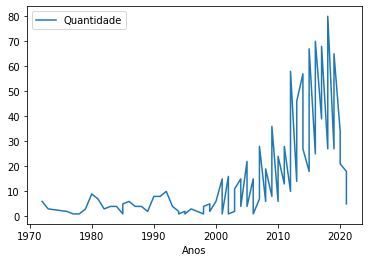

In [18]:
teses_dissertacao_ano.sort_values('Anos').plot('Anos','Quantidade')              #Ordenar por ano e plotar o gráfico

In [19]:
qtd_dissertacoes = teses_dissertacao_ano.query('Tipos == "Dissertação"').sort_values('Anos')      #Selecionar apenas dissertações
qtd_teses = teses_dissertacao_ano.query('Tipos == "Tese"').sort_values('Anos')                    #Selecionar apenas dissertações

Visualização personalizada

Text(0.0, 1.0, 'Quantidade de teses e dissertações de \nbiblioteconomia no Brasil de 1972-2021\n  ')

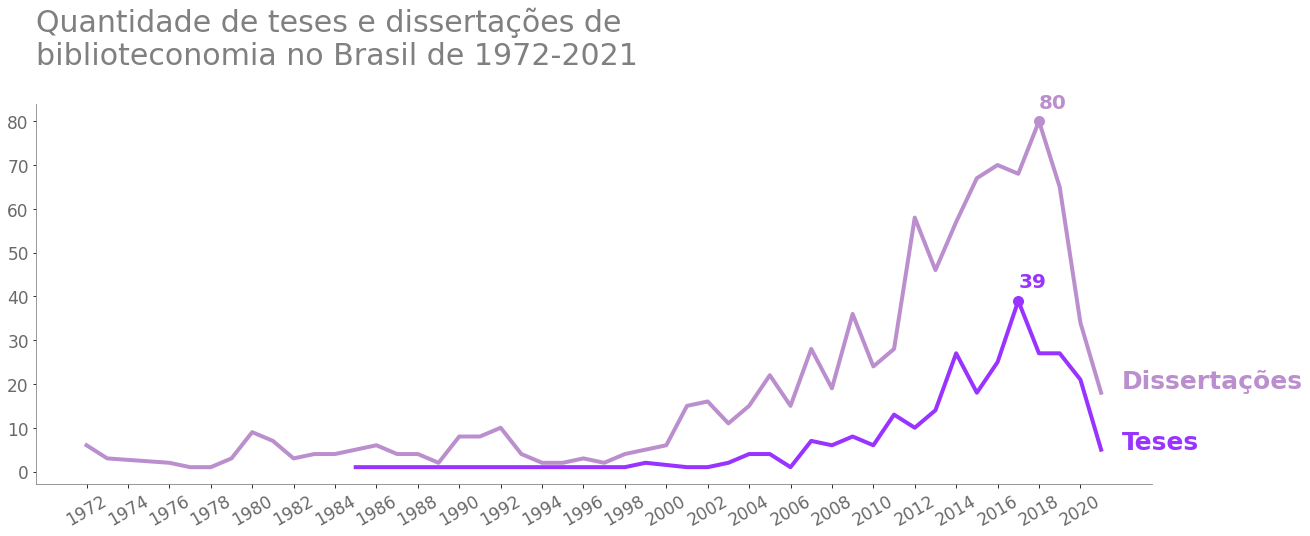

In [20]:
fig,ax = plt.subplots(figsize=(20,7),                                           #Dimensionar a figura
                      facecolor='white')                                        #Escolhendo a cor do fundo

plt.plot('Anos','Quantidade',data=qtd_dissertacoes,                             #Plotar o gráfico
         color='#BB8FCE',                                                       #Escolher a cor
         linewidth=4)                                                           #Aumentar a linha

plt.plot('Anos','Quantidade',data=qtd_teses,                                    #Plotar o outro gráfico
         color='#9933ff',                                                       #Escolher a cor
         linewidth=4)                                                           #Aumentar a linha

ax.spines['right'].set_visible(False)                                           #Excluir a linha direita do quadro
ax.spines['top'].set_visible(False)                                             #Excluir a linha de cima do quadro
ax.spines['bottom'].set_color('grey')                                           #Escolher cor para a linha de baixo do quadro                                                                 
ax.spines['left'].set_color('grey')                                             #Escolher cor da linha esquerda do quadro

plt.xticks(range(1972,2021,2), fontsize=17, color= 'dimgrey',rotation =30)      #Ajustar os valores do eixo x, tamanho, cor e rotacioná-los
plt.yticks(fontsize=17, color= 'dimgrey')                                       #Ajutsar o tamanho e cor do eixo y

plt.text(2018,83,'80',fontsize=20,color='#BB8FCE', fontweight='bold')           #Colocar o valor máximo de dissertações, tamanho, cor e formatação de texto
plt.text(2017,42,'39',fontsize=20,color='#9933ff', fontweight='bold')           #Colocar o valor máximo de teses, tamanho, cor e formatação de texto

plt.text(2022,19,'Dissertações',fontsize=25,color='#BB8FCE', fontweight='bold') #Colocar a legenda das dissertações, tamanho, cor e formatação de texto
plt.text(2022,5,'Teses',fontsize=25,color='#9933ff', fontweight='bold')         #Colocar a legenda das teses, tamanho, cor e formatação de texto

plt.scatter(2018,80,                                                                                  #Plotar o ponto do valor máximo
            s=100,                                                                                    #Ajustar o tamanho
            color='#BB8FCE')                                                                          #Escolher a cor
plt.scatter(2017,39,                                                                                  #Plotar o ponto do valor máximo                                                                                    
            s=100,                                                                                    #Ajustar o tamanho
            color='#9933ff')                                                                          #Escolher a cor


plt.title('Quantidade de teses e dissertações de \nbiblioteconomia no Brasil de 1972-2021' + '\n  ',  #Colocar o título
          fontsize=30,                                                                                #Tamanho do texto
          loc='left',                                                                                 #Ajustar do lado esquerdo
          color='grey')                                                                               #Escolher a cor


Esta visualização está agora com uma visualização objetiva dos principais pontos a se tomarem atenção com um desing mais interessante e claro.

## <font color= #9933ff	> 4.   Quantidade teses e dissertações por instituição  <font>






### <font color= #9933ff	> 4.1   Manipulação de dados <font>


In [21]:
dados['institutions'] = dados['institutions'].str.replace('_','')               #Substituir o "_" por nenhum caracter
instituicoes = dados[['types','institutions']]                                  #Criar variável selecionando os dados
instituicoes.columns = ['Tipo','Instiuicao']                                    #Renomear coluna

In [22]:
instituicoes = pd.DataFrame(dados[['types','institutions']].value_counts())     #Contar os valores de cada instituição          
instituicoes = instituicoes.reset_index()                                       #Resetar o índice
instituicoes.columns = ['Tipo','Instituicao','Quantidade']                      #Renomear colunas
instituicoes = instituicoes.set_index('Instituicao')                            #Refazer índice

In [23]:
Quantidade_Dissertacao = instituicoes.query('Tipo == "Dissertação"').groupby('Instituicao').sum()    #Criando coluna com a soma das dissertações
Quantidade_Dissertacao.columns = ['Dissertacoes']                                                    #Renomeando coluna
Quantidade_Tese = instituicoes.query('Tipo == "Tese"').groupby('Instituicao').sum()                  #Criando coluna com a soma das teses
Quantidade_Tese.columns = ['Teses']                                                                  #Renomeando coluna

In [24]:
Quantidade_Dissertacao = instituicoes.query('Tipo == "Dissertação"').groupby('Instituicao').sum()    #Criando coluna com a soma das dissertações
Quantidade_Dissertacao.columns = ['Dissertacoes']                                                    #Renomeando coluna
Quantidade_Tese = instituicoes.query('Tipo == "Tese"').groupby('Instituicao').sum()                  #Criando coluna com a soma das teses
Quantidade_Tese.columns = ['Teses']                                                                  #Renomeando coluna


In [25]:
instituicoes = Quantidade_Dissertacao.merge(Quantidade_Tese,how='outer', on='Instituicao')           #Agrupando colunas e criando novo df
instituicoes = instituicoes.fillna(0)                                                                #Preenchendo valores nulos com zero
instituicoes = instituicoes.astype(int)       

In [26]:
instituicoes_dissertacoes = instituicoes[['Dissertacoes']].sort_values(by='Dissertacoes',ascending=True)      #Criando variável de qtd de dissertacoes
instituicoes_teses = instituicoes[['Teses']].sort_values(by='Teses',ascending=True)                           #Criando variável de qtd de dissertacoes

In [27]:
instituicoes_dissertacoes = instituicoes_dissertacoes.tail(10)                  #Selecionar os dez primeiros
instituicoes_teses = instituicoes_teses.tail(10)                                #Selecionar os dez primeiros


In [28]:
dissertacoes = instituicoes_dissertacoes['Dissertacoes']                        #Criar series de dissertações
teses = instituicoes_teses['Teses']                                             #Criar series de teses

### <font color= #9933ff	> 4.2  Visualização de dados <font>

Visualização crua

<AxesSubplot:ylabel='Instituicao'>

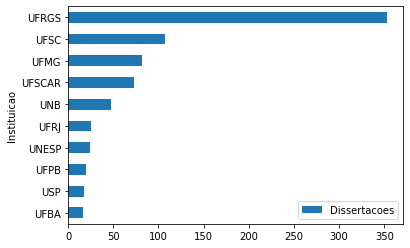

In [29]:
instituicoes_dissertacoes.plot(kind='barh')

<AxesSubplot:ylabel='Instituicao'>

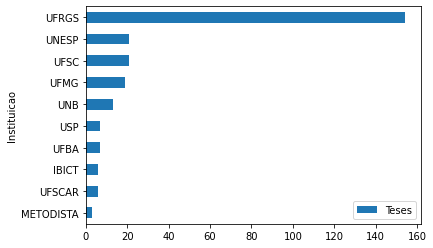

In [30]:
instituicoes_teses.plot(kind='barh')

Text(130, 1.5, '\n         Dentre as 51 instituições a $\\bf{UFRGS}$ liderou\n         com aproximadamente $\\bf{3.5 \\ vezes \\ mais}$ do \n         que a UFSC em segundo e $\\bf{20 \\ vezes}$ mais do \n         que a UFBA em décimo.\n         ')

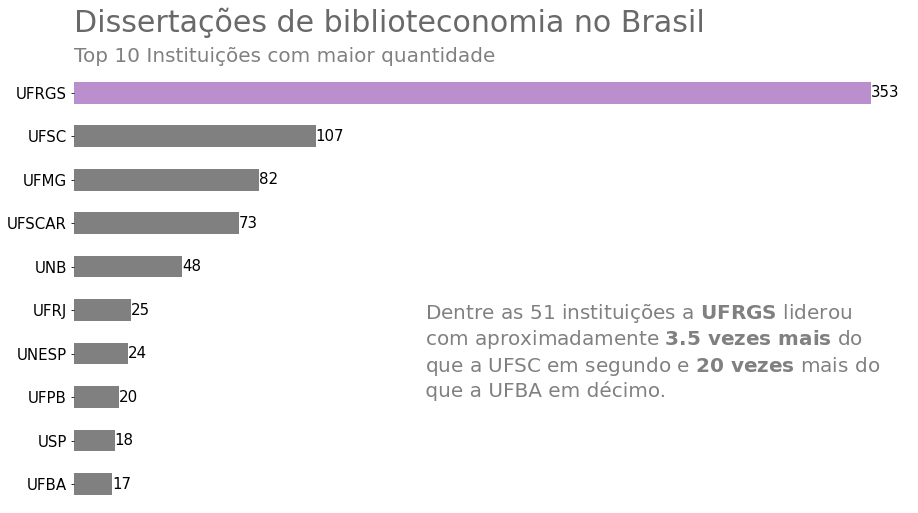

In [38]:
plt.figure(facecolor='white')                                                   #Escolhendo a cor do fundo

g = dissertacoes.plot(kind='barh',                                              #Criar gráfico
                      color=['gray']*9+['#BB8FCE'],                             #Escolher cores das barras
                      figsize=(15, 8),                                          #Escolher tamanho da figura
                      ylabel=False)                                             #Excluir rótulo do eixo y

for rotulo in g.containers:                                                     #Criar rótulo de dados nas barras
    g.bar_label(rotulo,fontsize=15)

for spine in plt.gca().spines.values():                                         #Remover os eixos do gráfico
    spine.set_visible(False)
                      
plt.xticks([])                                                                  #Excluir valores do eixo x
plt.yticks(fontsize=15)                                                         #Aumentar a fonte do eixo y
plt.ylabel(None)                                                                #Excluir rótulo do eixo y

plt.title('Dissertações de biblioteconomia no Brasil' + '\n',                   #Colocar o título
          fontsize=30,                                                          #Tamanho do texto
          loc='left',                                                           #Ajustar do lado esquerdo
          color='dimgrey')                                                      #Escolher a cor

plt.text(0,9.2,                                                                 #Escolher a posição x e y
         'Top 10 Instituições com maior quantidade'+'\n',                       #Plotar o texto 
         fontsize = 20,                                                         #Ajustar o tamanho da fonte
         color='gray')                                                          #Ajustar a cor
                      
plt.text(130,1.5,                                                               #Escolher a posição x e y e escrever o texto
         '''
         Dentre as 51 instituições a $\\bf{UFRGS}$ liderou
         com aproximadamente $\\bf{3.5 \\ vezes \\ mais}$ do 
         que a UFSC em segundo e $\\bf{20 \\ vezes}$ mais do 
         que a UFBA em décimo.
         ''',
         fontsize = 20,                                                         #Ajustar o tamanho da fonte
         color='gray')                                                          #Ajustar a cor


Text(50, 1.5, '\n         Dentre as 31 instituições a $\\bf{UFRGS}$ liderou\n         com aproximadamente $\\bf{7 \\ vezes \\ mais}$ do \n         que a UNESP em segundo e $\\bf{51 \\ vezes}$ mais do \n         que a METODISTA em décimo.\n         ')

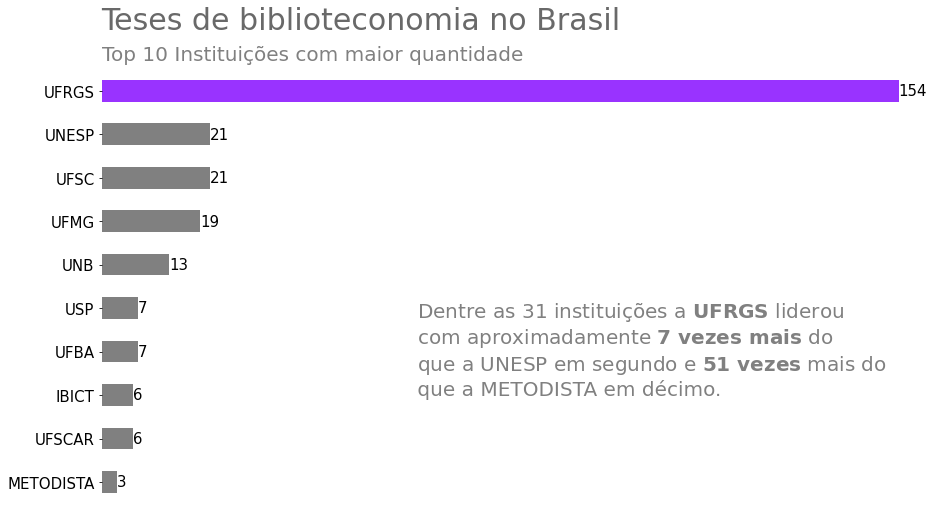

In [33]:
plt.figure(facecolor='white')                                                   #Escolhendo a cor do fundo
g = teses.plot(kind='barh',                                                     #Criar gráfico
               color=['gray']*9+['#9933ff'],                                    #Escolher cores das barras
               figsize=(15, 8),                                                 #Escolher tamanho da figura
               ylabel=False)                                                    #Excluir rótulo do eixo y

for rotulo in g.containers:                                                     #Criar rótulo de dados nas barras
    g.bar_label(rotulo,fontsize=15)

for spine in plt.gca().spines.values():                                         #Remover os eixos do gráfico
    spine.set_visible(False)
                      
plt.xticks([])                                                                  #Excluir valores do eixo x
plt.yticks(fontsize=15)                                                         #Aumentar a fonte do eixo y
plt.ylabel(None)                                                                #Excluir rótulo do eixo y

plt.title('Teses de biblioteconomia no Brasil' + '\n',                          #Colocar o título
          fontsize=30,                                                          #Tamanho do texto
          loc='left',                                                           #Ajustar do lado esquerdo
          color='dimgrey')                                                      #Escolher a cor

plt.text(0,9.2,                                                                 #Escolher a posição x e y
         'Top 10 Instituições com maior quantidade'+'\n',                       #Plotar o texto 
         fontsize = 20,                                                         #Ajustar o tamanho da fonte
         color='gray')                                                          #Ajustar a cor
                      
plt.text(50,1.5,                                                                #Escolher a posição x e y e escrever o texto
         '''
         Dentre as 31 instituições a $\\bf{UFRGS}$ liderou
         com aproximadamente $\\bf{7 \\ vezes \\ mais}$ do 
         que a UNESP em segundo e $\\bf{51 \\ vezes}$ mais do 
         que a METODISTA em décimo.
         ''',
         fontsize = 20,                                                         #Ajustar o tamanho da fonte
         color='gray')                                                          #Ajustar a cor



## <font color= #9933ff	> Considerações finais <font>

Criar visualizações de dados não é uma tarefa simples e está ligada ao storytelling da análise. 

Deve-se sempre averiguar o contexto do público destinado, ser objetivo, claro e simples nas informações a serem passadas. 
